## Simple Linear Regression
In this notebook we will build a simple linear regression model with Sales data using appropriate predictor variable

## Step 1: Reading and Understanding Data

Let's start with followng steps:<br>
1.Importing data using pandas library<br>
2.Understanding the structure of data<br>
3.Residual Analysis<br>
4.Predicting and evaluating on the test set

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [53]:
#read data
advertising=pd.read_csv("C:\\Users\spandit\Desktop\ITS\Personal\AIML\Linear_Regression\Sales.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [54]:
advertising.shape

(200, 4)

In [55]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [56]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

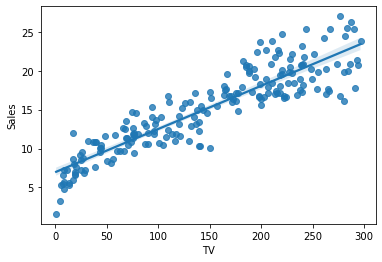

In [57]:
#visualize the dataset
sns.regplot(x='TV',y='Sales',data=advertising)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

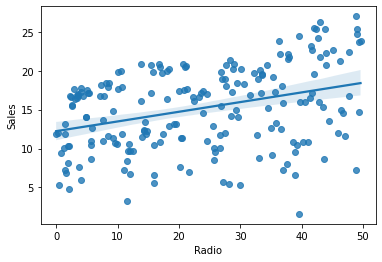

In [58]:
#Relationship between Radio and Sales
sns.regplot(x='Radio',y='Sales',data=advertising)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

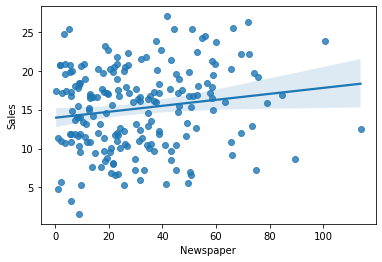

In [59]:
#Relationship between Newspaper and Sales
sns.regplot(x='Newspaper',y='Sales',data=advertising)

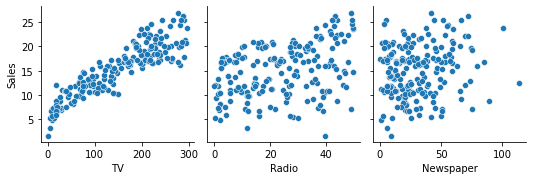

In [60]:
sns.pairplot(data=advertising,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

In [61]:
#Checking Correlation between various variables
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

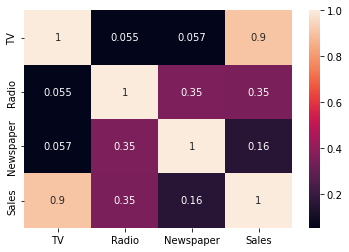

In [62]:
sns.heatmap(advertising.corr(),annot=True)

### Step2: Performing Simple Linear Regression<br>
Equation of linear regression<br>
y=c+m1x1+m2x2.....+mnxn<br>
* y is the response
* c is the intercept
* m1 is the coefficient for the first feature
* mn is the coefficient for the nth feature<br>
In our case:<br>
y=c+m*TV
<br>
The m values are called the models coefficient or model paarameters.

## Steps:

- Create X and Y
- Create train and test sets (70-30,80-20)
- Train your model on the training set (i.e. learn the coefficients)
- Evaluate the model ( training set, test set)

In [65]:
#Create X and y
X=advertising['TV']
y=advertising['Sales']

In [69]:
#Train-test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)
y_test.shape

(60,)

In [70]:
#training the model
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [72]:
#training the model
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [75]:
#y=c+m1.X1
#y=c.const+m1.TV
#fitting the model
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params
#6.94 + 0.05* TV

const    6.948683
TV       0.054546
dtype: float64

In [76]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           1.52e-52
Time:                        22:36:21   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# 1.Coef and p-value
# 2. R-squared is 81.6% ,very high
# 3. p(F-statistic) is low => the fit is not by chance

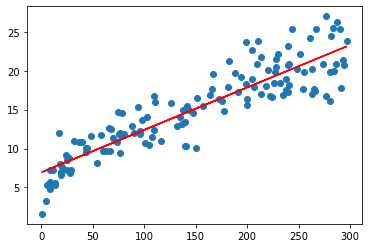

In [82]:
plt.scatter(X_train,y_train)

y_train_pred=lr_model.predict(X_train_sm)
y_train_pred
plt.plot(X_train,y_train_pred,'r')
plt.show()

In [83]:
#error=f(y_train,y_train_pred)

In [84]:
res=y_train-y_train_pred

C:\Users\spandit\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Plot')

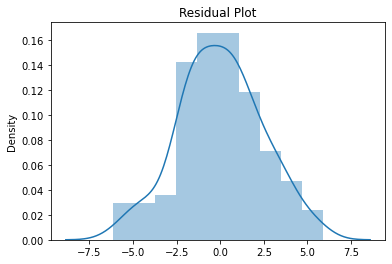

In [90]:
#plot the residuals

sns.distplot(res)
plt.title("Residual Plot")

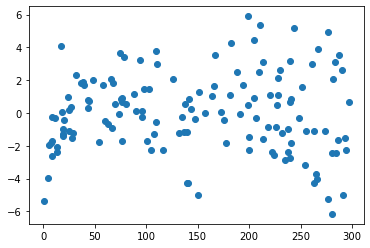

In [92]:
#look for patterns in residuals
plt.scatter(X_train,res)
plt.show()

## Step: Prediction and Evaluation on Test Set

In [94]:
#prediction on the test set(y_test_pred)
#evaluate the model,r-squared, on the test

In [96]:
#add a constant/intercept to test
X_test_sm=sm.add_constant(X_test)
#pred on test
y_test_pred=lr_model.predict(X_test_sm)

In [100]:
#evaluate the model, r-squared, on the test
#r-squared
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2



0.7921031601245658

In [101]:
#r2 on train
r2_score(y_true=y_train,y_pred=y_train_pred)

0.8157933136480389

In [102]:
#mean squared error
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

4.077556371826956

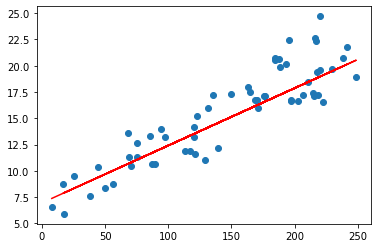

In [103]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

## Linear regression using sklearn

In [114]:
#train test set
#Train-test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)
y_test.shape

#reshape to (140,1)
x_train_lm=X_train.values.reshape(-1,1)
x_test_lm=X_test.values.reshape(-1,1)


In [119]:
#steps in Sklearn model building
#1.create an object of linear regression model

lm=LinearRegression()

#2.fit the model

lm.fit(x_train_lm,y_train)
#3.see the parameters ,make predictions(train,test)
print(lm.coef_)
print(lm.intercept_)

#4.make predictions
y_train_pred=lm.predict(x_train_lm)
y_test_pred=lm.predict(x_test_lm)




[0.05454575]
6.948683200001357


In [121]:
#5.Evaluate the model
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))



0.8157933136480389
0.7921031601245662
